In [2]:
import os
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import community

In [4]:
os.getcwd()

'D:\\home\\adriana\\GitHub\\social_interaction'

In [95]:
#(one needs to eliminate the first row in followers_complete.csv though still

friendship = nx.read_edgelist('data_cleaning/followers_complete.csv',
                                    delimiter = ',', 
                                    create_using = nx.Graph, 
                                    nodetype = str,
                                    data = ("person","retweet_count")
                                   )

#retweets = networkx.read_edgelist('get_retweets/number_of_retweetsZ.csv',
 #                              delimiter = ',', 
  #                             create_using = networkx.DiGraph)

Setting Up The Nodes

In [132]:
df = pd.read_csv("get_retweets/number_of_retweets.csv", header = None)

df
liste = df[1]

In [133]:
weiteres = liste.tolist()
print(df)

                    0    1
0                   0    1
1    @realDonaldTrump  918
2         @WhiteHouse  655
3          @TeamTrump  273
4      @GOPChairwoman  211
..                ...  ...
96     @SenRonJohnson   15
97     @SenThomTillis   15
98     @EliseStefanik   15
99          @brithume   15
100    @ChuckGrassley   15

[101 rows x 2 columns]


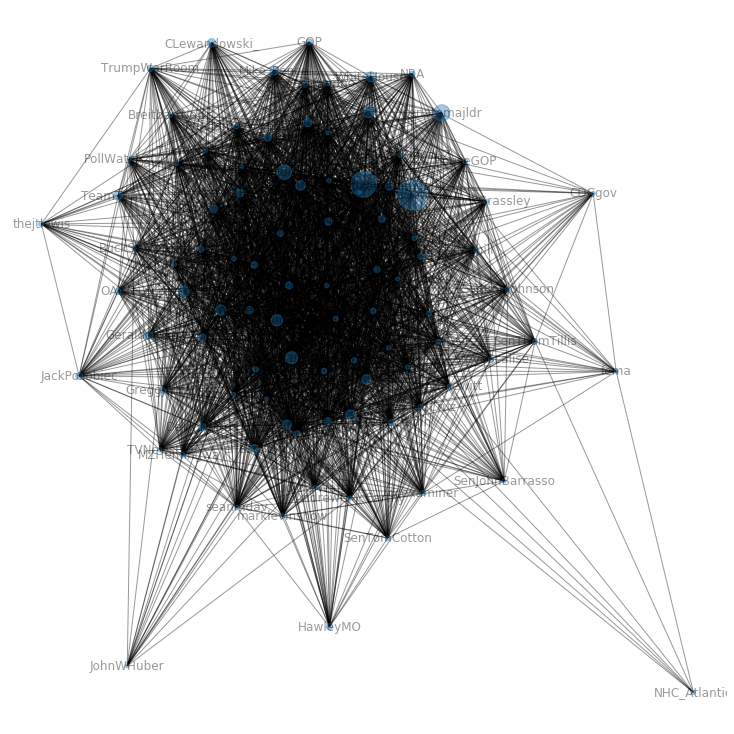

In [9]:
plt.figure(figsize=(10,10))
nx.draw(friendship, with_labels = True, node_size = weiteres, edge_color="black", alpha=0.4)

In [59]:
nx.average_clustering(friendship)

0.7982113934884519

In [35]:
tester = nx.triangles(friendship)

In [34]:
cliques = nx.find_cliques(friendship)

In [36]:
coords = nx.spring_layout(friendship)

In [37]:
comm = community.best_partition(friendship)

In [153]:
liste3 = []
for key in comm.keys():
    liste3.append(key)

In [88]:
comm_as_df = pd.DataFrame.from_dict(comm, orient = "index")
comm_as_df.to_csv("clustering/automated_best_partition.csv", sep = ";")

                 0
realDonaldTrump  0
LouDobbs         1
GOPLeader        1
senatemajldr     1
Jim_Jordan       1
...             ..
fema             1
AndrewCMcCarthy  2
TheRightMelissa  0
JohnWHuber       2
Lrihendry        0

[97 rows x 1 columns]


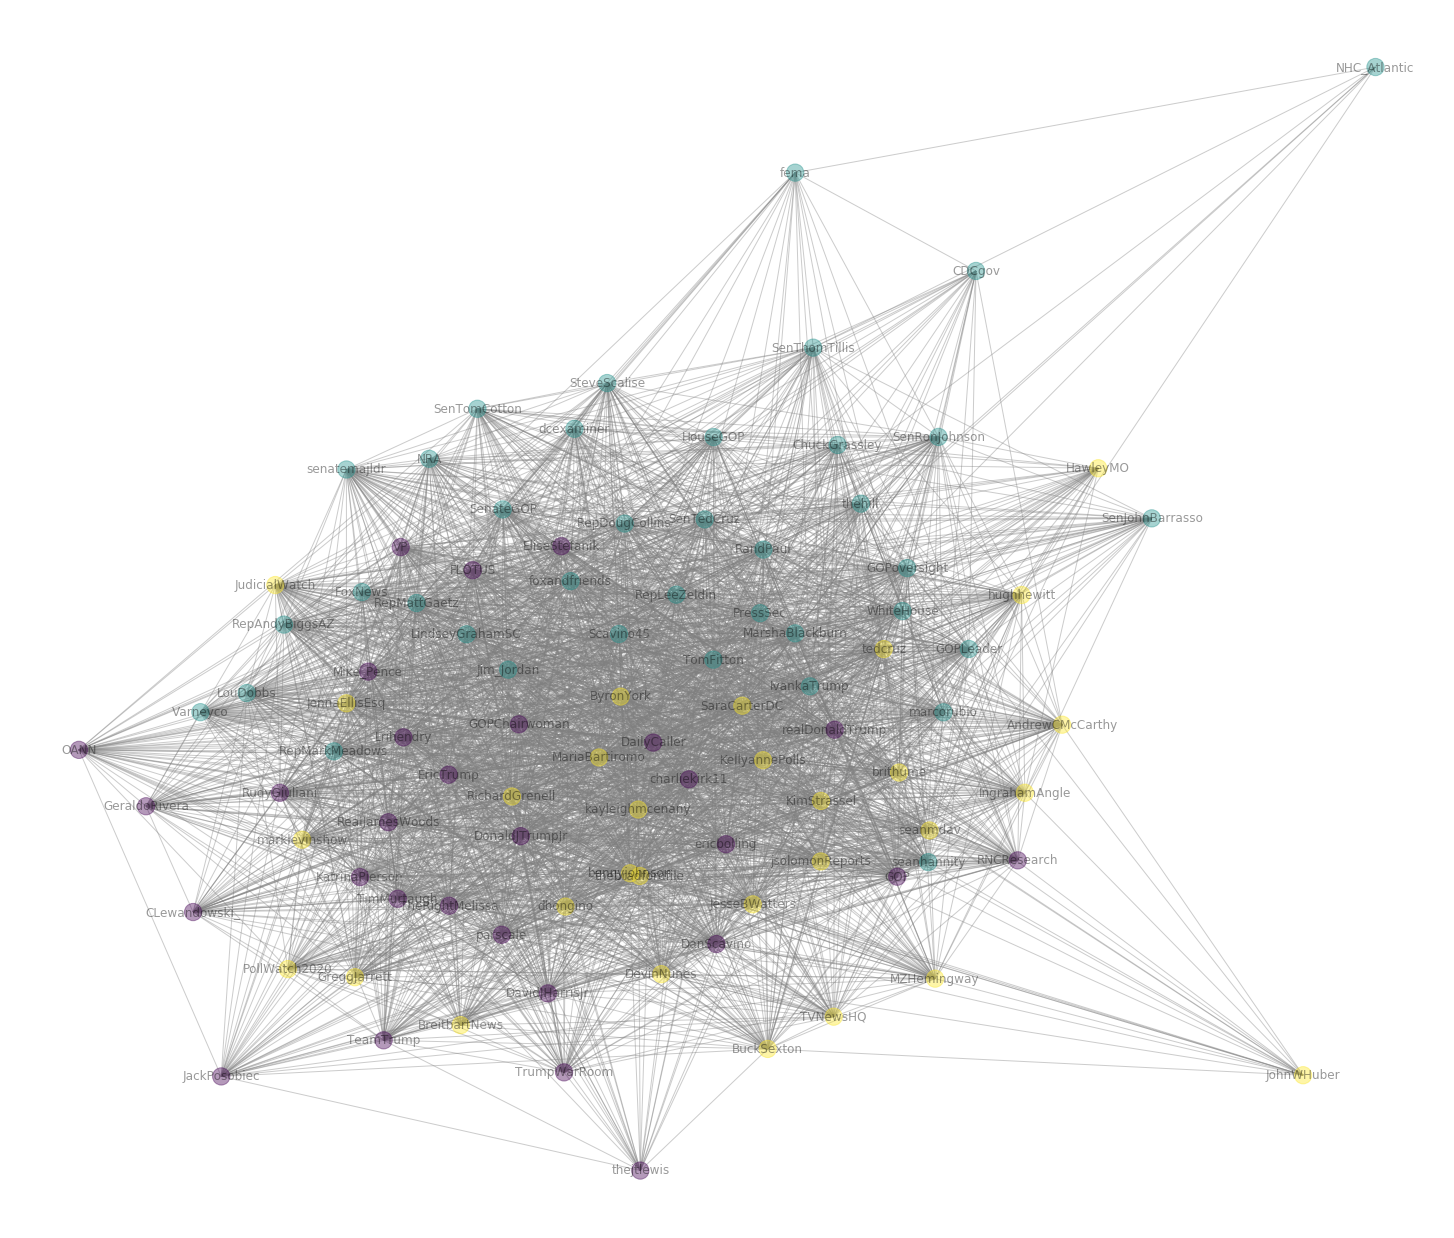

In [62]:
plt.figure(figsize=(20,17))
nx.draw(friendship,
              pos = coords,
              node_color = list(dict.values(comm)), with_labels = True, alpha = 0.4, 
        edge_color="grey")

In [116]:
community.modularity(comm, friendship)
doc

,0,Kategorie
1,realDonaldTrump,1.0
2,WhiteHouse,2.0
3,TeamTrump,2.0
4,GOPChairwoman,1.0
5,DanScavino,5.0
...,...,...
96,SenRonJohnson,1.0
97,SenThomTillis,1.0
98,EliseStefanik,1.0
99,brithume,4.0


In [144]:
followers = pd.read_csv('get_retweets/number_of_retweetsZ.csv', sep = ",")
print(followers)

                      0
0   realDonaldTrump,918
1        WhiteHouse,655
2         TeamTrump,273
3     GOPChairwoman,211
4        DanScavino,145
..                  ...
95     SenRonJohnson,15
96     SenThomTillis,15
97     EliseStefanik,15
98          brithume,15
99     ChuckGrassley,15

[100 rows x 1 columns]


In [170]:
doc = pd.read_csv("clustering/klassifizierung _numbered.csv", index_col= "Unnamed: 0")
print(doc)

liste1 = doc["0"].tolist()
liste2 = doc["Kategorie"].tolist()

                   0  Kategorie
1    realDonaldTrump        1.0
2         WhiteHouse        2.0
3          TeamTrump        2.0
4      GOPChairwoman        1.0
5         DanScavino        5.0
..               ...        ...
96     SenRonJohnson        1.0
97     SenThomTillis        1.0
98     EliseStefanik        1.0
99          brithume        4.0
100    ChuckGrassley        1.0

[97 rows x 2 columns]


In [167]:
dicton = dict(zip(liste1, liste2))


#nicht_da = []
#for element in dicton.keys():
 #   if element in liste3:
  #      continue
   # else:
    #    nicht_da.append(element)
        
        
#print(nicht_da)

['paulsperry_', 'TV4HQ', 'mike_pence', 'Fox4', 'Breitbart4', 'DRUDGE_REPORT']


In [174]:

        
print(len(doc))
        

97


ValueError: 'c' argument has 100 elements, which is not acceptable for use with 'x' with size 97, 'y' with size 97.

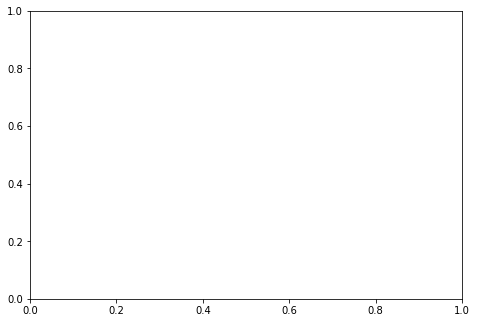

In [171]:
documento = nx.read_edgelist(doc, create_using = nx.Graph, nodetype = str)

nx.draw(friendship,
              pos = coords,
              node_color = list(dict.values(dicton)), with_labels = True, alpha = 0.4, 
        edge_color="grey")